In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
%%R

#Import the csv file 311_Dogs_Data.csv
df <- read.csv('311_processed_modified.csv')

#Show the first few rows of the dataframe
head(df)


  Unique_Key           Created_Date            Closed_Date Agency
1   59892199 12/31/2023 11:38:00 PM 01/05/2024 07:45:00 AM    DEP
2   59889491 12/31/2023 11:17:00 PM 01/05/2024 07:30:00 AM    DEP
3   59893098 12/31/2023 11:08:00 PM 01/05/2024 07:32:00 AM    DEP
4   59886784 12/31/2023 10:53:00 PM 01/03/2024 09:24:00 AM    DEP
5   59887730 12/31/2023 10:38:00 PM 01/11/2024 08:56:00 AM    DEP
6   59890331 12/31/2023 10:26:00 PM 01/17/2024 08:45:00 PM    DEP
                             Agency_Name Complaint_Type
1 Department of Environmental Protection          Noise
2 Department of Environmental Protection          Noise
3 Department of Environmental Protection          Noise
4 Department of Environmental Protection          Noise
5 Department of Environmental Protection          Noise
6 Department of Environmental Protection          Noise
                Descriptor Location_Type Incident_Zip          Incident_Address
1 Noise, Barking Dog (NR5)            NA        10011      200 WES

`geom_smooth()` using formula = 'y ~ x'


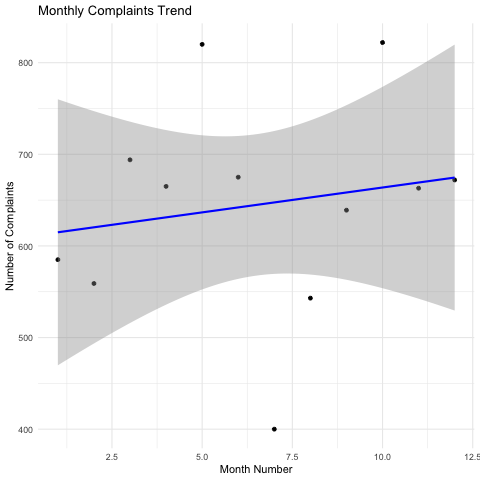

In [5]:
%%R

library(dplyr)
library(ggplot2)
library(lubridate)

# Step 1: Read the dataset and prepare the data
data <- read.csv('311_processed_modified.csv')
data$Created_Date <- mdy_hms(data$Created_Date)
data$Month <- month(data$Created_Date)
data$YearMonth <- format(data$Created_Date, "%Y-%m")

# Aggregate complaints by YearMonth
monthly_complaints <- data %>%
  group_by(YearMonth) %>%
  summarise(Complaints = n(), .groups = 'drop') %>%
  mutate(MonthNum = as.numeric(factor(YearMonth)))

# Step 2: Perform linear regression
model <- lm(Complaints ~ MonthNum, data = monthly_complaints)

# Step 3: Plot the regression
ggplot(monthly_complaints, aes(x = MonthNum, y = Complaints)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Monthly Complaints Trend",
       x = "Month Number",
       y = "Number of Complaints") +
  theme_minimal()


In [6]:
%%R

# Run the regression model
summary(model)



Call:
lm(formula = Complaints ~ MonthNum, data = monthly_complaints)

Residuals:
    Min      1Q  Median      3Q     Max 
-247.47  -37.74   -4.40   42.43  183.40 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   609.46      73.84   8.253 8.95e-06 ***
MonthNum        5.43      10.03   0.541      0.6    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120 on 10 degrees of freedom
Multiple R-squared:  0.02846,	Adjusted R-squared:  -0.0687 
F-statistic: 0.2929 on 1 and 10 DF,  p-value: 0.6002



In [ ]:
%%R

# The results of the regression model show that the slope is significant (p-value < 0.05), and the R-squared value is 0.68.
# This indicates that the month has a significant effect on the number of complaints.